<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_4_OLCI_bands_imagery.ipynb" target="_blank"><< OLCI bands and imagery</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_OLCI_CHL_comparison.ipynb" target="_blank">Comparing OLCI chlorophyll products >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=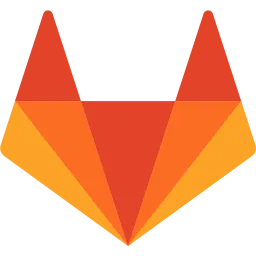" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?term=learn%20olci&sort=score%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7COLCI%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=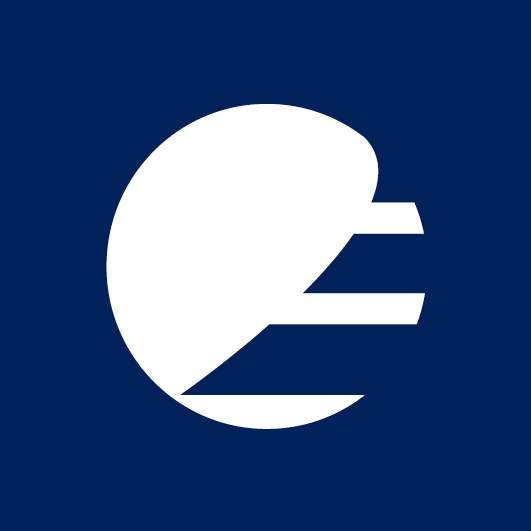" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-olci/HEAD?urlpath=%2Ftree%2F1_OLCI_introductory%2F1_5_OLCI_radiance_reflectance_spectra.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-olci/1_OLCI_introductory/1_5_OLCI_radiance_reflectance_spectra.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1a_OLCI_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_OLCI_data_access_HDA.ipynb" target="_blank">1_1b_OLCI_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.5 OLCI radiance and reflectance spectra
    
</div>

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level 2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level 1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* How to extract data from different wavebands in the OLCI products from the associated netcdf files.
* How to extract the radiance and reflectance spectra over a specific area. 
* That level-1 and level-2 data are very different, and why.
* That the ocean colour spectra retrieved by OLCI vary depending on the type of water they represent.
* How to make interactive plots using the Bokeh library.



### Outline

Whilst images can allow us to interpret ocean colour generally over a spatial view, we can understand much more about what is going on in the oceans by looking at the spectra provided by modern ocean colour sensors like the Ocean and Land Colour Instrument aboard the Sentinel-3 satellites. An understanding of the spectral variability of the ocean colour signal is crucial to the design of ocean colour instruments, the processing of data measured by them, as well as for the development of new algorithms, and interpretation of errors and uncertainties. Ocean colour instruments measure the light emitted from the sun after it has been reflected following interactions with the atmosphere and ocean. From an ocean perspective it is these interactions which give us information we need on the composition of ocean waters, but we must also consider the impact of the atmosphere, to retrieve this information.

In this notebook we will take a closer look at the spectral characteristics of level-1 and level-2 data from the OLCI instruments. 

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Radiance and reflectance](#section1)
 2. [Reading band data from the xml manifest file](#section2)
 3. [Reading in the radiance and reflectances](#section3)
 4. [Plotting the radiance and reflectances](#section4)
 5. [Applying your knowledge](#section5)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import glob                                             # a library that aids in searching for files
import inspect                                          # a library that lets us query function source code
import numpy as np                                      # a library that provides support for array-based mathematics
import os                                               # a library that allows us access to basic operating system commands like making directories
import warnings                                         # a library that helps us manage warnings
import xarray as xr                                     # a library that supports the use of multi-dimensional arrays in Python
import xml.etree.ElementTree as ET                      # a library that helps us parse XML files
import pandas as pd                                     # a library that provides analysis tools for time-series and dataframes
from bokeh.io import output_notebook, show, export_png  # a library that provides Bokeh plotting support
from bokeh.plotting import figure                       # a library that provides Bokeh plotting support
from bokeh.models import HoverTool, Range1d, LinearAxis # a library that provides Bokeh plotting support
from bokeh.layouts import row                           # a library that provides Bokeh plotting support
import eumartools                                       # a EUMETSAT library that support working with Sentinel-3 products
warnings.filterwarnings('ignore')

Now lets initiate Bokeh, which will support our plotting at the end of this notebook.

In [2]:
output_notebook()

Loading BokehJS ...

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Radiance and reflectance
[Back to top](#TOC_TOP)

</div>

At level-1B, OLCI the main data product from the OLCI sensor is radiance which is a measure of the light observed by the sensor at the different wavelengths. At level-2 the main data product is reflectance, which is the relative proportion of light reflected by an object compared to the light it was exposed to (i.e. by the sun in the case of passive radiometry). You can find out all about radiance and reflectance in the <a href="https://oceanopticsbook.info/view/inherent-and-apparent-optical-properties/apparent-optical-properties" target="_blank">Ocean Optics web book</a>, as well as how they are measured by different instruments. 

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Reading band data from the xml manifest file
[Back to top](#TOC_TOP)

</div>

As in the previous notebooks in this series, we will start by defining the paths that point to the location of the data files we are interested in.

In [3]:
SAFE_directories = [
    os.path.join(os.getcwd(), 'products', 
    'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3'),
    os.path.join(os.getcwd(), 'products',
    'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3')
    ]

Next, we're going to set up a Python dictionary object, in which will place information and data from the wavebands we are interested in. 

In [4]:
# set up data dictionary
data = {
        'rad':{
        'band_names': [],
        'band_centres': [],
        'band_widths': [],
        'means': [],
        'uppers': [],
        'lowers': []},
        
        'ref':{
        'band_names': [],
        'band_centres': [],
        'band_widths': [],
        'means': [],
        'uppers': [],
        'lowers': [],
        'errs': []}
        }

In the next cell we will read the manifest file and extract the names of the bands, their centre wavelengths, and their width (in nm).

In [5]:
for SAFE_directory in SAFE_directories:

    if "_OL_1_" in SAFE_directory:
        tag = "rad"
    else:
        tag = "ref"
        
    tree = ET.parse(os.path.join(SAFE_directory,'xfdumanifest.xml'))
    root = tree.getroot()
    match = {"sentinel3":"http://www.esa.int/safe/sentinel/sentinel-3/1.0"}
    data[tag]["band_names"] = [item.attrib["name"] for item in root.findall('.//sentinel3:band', match)]
    data[tag]["band_centres"] = [float(item.text) for item in root.findall('.//sentinel3:centralWavelength', match)]
    data[tag]["band_widths"] = [float(item.text) for item in root.findall('.//sentinel3:bandwidth', match)]

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Reading in the radiance and reflectance data
[Back to top](#TOC_TOP)

</div>

To understand how radiance and reflectance vary across different water types, we want to extract a spectra associated with a limited number of pixels. So we'll set an area of interest to average over. We'll also add in a grid scaling factor, this is only to reduce the resolution for the map plot we will make to accompany the spectra, so we can see where in the image we are looking at.

In [6]:
# makes area average
lons = [-1.0, 0.0, 0.0, -1.0, -1.0]
lats = [55.5, 55.5, 56.5, 56.5, 55.5]

# for minimap plotting only
grid_reduce = 5

To extract a region of interest, and to plot on a map, we need the latitude and longitude information in the data product. We extract that from geo_coordinates netcdf file.

In [7]:
geo_file = os.path.join(SAFE_directories[0],'geo_coordinates.nc')
geo_vars = xr.open_dataset(geo_file)
lon = geo_vars.longitude.data[::grid_reduce, ::grid_reduce]
lat = geo_vars.latitude.data[::grid_reduce, ::grid_reduce]
geo_vars.close()

To extract the area of interest, we will use a function from the eumartools library - you can look at this in more detail by copying `print(inspect.getsource(eumartools.subset_image))` into a code cell and running it. This will create a mask we can use on the data to extrat the part we want.

In [8]:
ex, ey, mask = eumartools.subset_image(lon, lat, lons, lats)
mask = mask.T

In the next cell we will read all the data we need from the various netcdf files corresponding to the radiances (for the level-1B product) and the reflectances (for the level-2 product), as well as the associated error estimates. We'll also do a little bit of maths to work out the mean, and upper and lower limits of the radiances and reflectances within our region of interest.

In [9]:
RGB_dict = {}
# read everything we need from netcdf
for SAFE_directory in SAFE_directories:

    if "_OL_1_" in SAFE_directory:
        tag = "rad"
    else:
        tag = "ref"
        
    # open all the files at once
    band_vars = xr.open_mfdataset(glob.glob(os.path.join(SAFE_directory,'Oa*.nc')))
    for band_var in band_vars:
        print(f"Reading:  {band_var}")
        var = band_vars[band_var].data[::grid_reduce, ::grid_reduce]*mask
        if "_err" in band_var:
            data[tag]["errs"].append(np.array(np.nanmean(var)))
        else:
            data[tag]["means"].append(np.array(np.nanmean(var)))
            data[tag]["uppers"].append(np.array(np.nanmean(var) + np.nanstd(var)))
            data[tag]["lowers"].append(np.array(np.nanmean(var) - np.nanstd(var)))
            if "Oa08_radiance" in band_var or "Oa06_radiance" in band_var or "Oa02_radiance" in band_var:
                    # this is just to build our quick minimap
                    RGB_dict[band_var] = band_vars[band_var].data[::grid_reduce, ::grid_reduce]

    band_vars.close()

Reading:  Oa01_radiance
Reading:  Oa02_radiance
Reading:  Oa03_radiance
Reading:  Oa04_radiance
Reading:  Oa05_radiance
Reading:  Oa06_radiance
Reading:  Oa07_radiance
Reading:  Oa08_radiance
Reading:  Oa09_radiance
Reading:  Oa10_radiance
Reading:  Oa11_radiance
Reading:  Oa12_radiance
Reading:  Oa13_radiance
Reading:  Oa14_radiance
Reading:  Oa15_radiance
Reading:  Oa16_radiance
Reading:  Oa17_radiance
Reading:  Oa18_radiance
Reading:  Oa19_radiance
Reading:  Oa20_radiance
Reading:  Oa21_radiance
Reading:  Oa01_reflectance
Reading:  Oa01_reflectance_err
Reading:  Oa02_reflectance
Reading:  Oa02_reflectance_err
Reading:  Oa03_reflectance
Reading:  Oa03_reflectance_err
Reading:  Oa04_reflectance
Reading:  Oa04_reflectance_err
Reading:  Oa05_reflectance
Reading:  Oa05_reflectance_err
Reading:  Oa06_reflectance
Reading:  Oa06_reflectance_err
Reading:  Oa07_reflectance
Reading:  Oa07_reflectance_err
Reading:  Oa08_reflectance
Reading:  Oa08_reflectance_err
Reading:  Oa09_reflectance
Readi

Now we will place all this data in to a dataframe from the Pandas library - this makes the data easier to work with.

In [10]:
# put everything in Pandas dataframes for convenience
data["rad"]["low_band"]  = [a-b for a,b in zip(data["rad"]["band_centres"], data["rad"]["band_widths"])]
data["rad"]["high_band"] = [a+b for a,b in zip(data["rad"]["band_centres"], data["rad"]["band_widths"])]
rad_df = pd.DataFrame(data["rad"])

data["ref"]["low_band"]  = [a-b for a,b in zip(data["ref"]["band_centres"], data["ref"]["band_widths"])]
data["ref"]["high_band"] = [a+b for a,b in zip(data["ref"]["band_centres"], data["ref"]["band_widths"])]
data["ref"]["low_errs"]  = [a-b for a,b in zip(data["ref"]["means"], data["ref"]["errs"])]
data["ref"]["high_errs"] = [a+b for a,b in zip(data["ref"]["means"], data["ref"]["errs"])]
ref_df = pd.DataFrame(data["ref"])

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Plotting the radiance and reflectance spectra
[Back to top](#TOC_TOP)

</div>

We'll use one of the RGB recipes we looked at in the [OLCI bands and imagery notebook](./1_4_OLCI_bands_imagery.ipynb) to create an RGB image to help use understand the spectra we will plot.

In [11]:
# build minimap
rgb = np.dstack(((np.log10(RGB_dict["Oa08_radiance"] * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                 (np.log10(RGB_dict["Oa06_radiance"] * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                 (np.log10(RGB_dict["Oa02_radiance"] * 0.01) + 1.6516951369518393) / 1.9887713527138795))
                     
rgb = eumartools.normalise_image(rgb, unhitch='True')
rgb = eumartools.truncate_image(rgb)
rgb = eumartools.histogram_image(rgb, nbins=512)

# make image array
img = np.empty((np.shape(rgb)[0], np.shape(rgb)[1]), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((np.shape(rgb)[0], np.shape(rgb)[1], 4))
for ii in range(np.shape(rgb)[-1]):
    view[:, :, ii] = rgb[:,:,ii]*255
# add alpha
view[:, :, 3] = 255

Now, let's plot our spectra...

In [12]:
# create a new plot
hover = HoverTool(tooltips=[("(wavelength, rad/ref)", "($x, $y)")])

# spectra
p = figure(width=750, height=600,
           title="Co-located OLCI radiances & reflectances over subset region",
           y_range=(0, max(rad_df["uppers"])*1.1),
           tools=[hover, 'pan', 'box_zoom', 'save', 'reset'],
           toolbar_location="below")

p.title.align = 'center'
p.title.text_font_size = '14pt'
p.xaxis.axis_label = r"$$ \text{Wavelength } [nm] $$"
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label = r"$$\color{navy} \text{TOA radiance } [mW m^{-2} sr^{-1} nm^{-1}] $$"
p.add_layout(LinearAxis(y_range_name="ref", axis_label=r"$$\color{firebrick} \text{Reflectance } [sr^{-1}] $$"),
             'right')
p.extra_y_ranges = {"ref": Range1d(start=0, end=max(ref_df["uppers"])*1.1)}

for axis, sr, c, nm in zip(["default", "ref"], [rad_df, ref_df], ["navy", "firebrick"], ["radiance", "reflectance"]):
    p.varea(source=sr, x="band_centres", y1="lowers", y2="uppers", alpha=0.5, color=c, y_range_name=axis)
    p.line(source=sr, x="band_centres", y="means", line_width=2, color=c, y_range_name=axis, legend_label=nm)
    p.circle(source=sr, x="band_centres", y="means", line_color="black", fill_color=c, size=4, y_range_name=axis)
    p.segment(source=sr, x0="low_band", y0="means", x1="high_band", y1="means", line_color="black", y_range_name=axis)
    p.yaxis.axis_label_text_color = c
    p.yaxis.axis_label_text_font_size = "14pt"
    if axis == "ref":
        p.segment(source=sr, x0="band_centres", y0="low_errs", x1="band_centres", y1="high_errs", line_color="black",
                  y_range_name=axis)
        
p.legend.location = "top_right"
p.legend.title = 'Spectra'
p.legend.title_text_font_style = "bold"
p.legend.title_text_font_size = "14pt"

# minimap
m = figure(width=400, height=400, toolbar_location="below")
m.image_rgba(image=[np.flipud(img)], x=0, y=0, dw=np.shape(rgb)[0], dh=np.shape(rgb)[1])
m.line(x=ex, y=[np.shape(img)[1] - i for i in ey], color="firebrick")
m.axis.visible = False ; m.xgrid.visible = False ; m.ygrid.visible = False

show(row(p, m))

Although not in directly comparable units, the radiance from OLCI, which represents the signal recieved at the top of atmosphere, is a much bigger signal than the reflectance, which has had the effects of the atmosphere removed. In fact the ocean related signal typically represents less than 10% of the total signal recieved by the satellite at the top of the atmosphere (in the visiable wavelengths). Thus, correcting for the effects of the atmosphere is a very important part of ocean colour processing.

In the radiance spectra you can see that most of the light is in the blue part of the spectrum, and RGB images made with level-1B radiance instead of reflectance are typically much more blue as a result. Another feature that is immediately noticeable is the oxygen absorption around 760 nm. 

Comparatively, the reflectance spectra shows more signal in the green. As well as some additional bumps and wiggles after 600 nm that can provide us with more information about what is in the ocean waters we are looking at. 

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Applying your knowledge
[Back to top](#TOC_TOP)

</div>

### What to try next?

* Can you make spectral plots for turbid waters?
* Can you make spectral plots for other plankton blooms?
* How do you think we can improve the quality of our radiance/reflectance spectra over water?

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_4_OLCI_bands_imagery.ipynb" target="_blank"><< OLCI bands and imagery</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_6_OLCI_CHL_comparison.ipynb" target="_blank">Comparing OLCI chlorophyll products >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>